# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama : Tri Nuryatul Lestari
- Email : tri.lestari2388@gmail.com
- Id Dicoding : triiinl

## Persiapan

### Import Dependencies

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import pickle

import warnings
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import chi2_contingency

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [3]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt


## Data Accessing

In [2]:
# Load data dari format csv ke format pandas dataframe
df = pd.read_csv("student's_performance.csv", delimiter=';')

## Data Understanding

In [3]:
# Menampilkan 5 row teratas data dari pandas df
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Menampilkan ringkasan pandas df dengan cepat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Menampilkan ringkasan statistik deskriptif dari pandas df
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Menampilkan jumlah missing value setiap fitur
print("Jumlah missing value")
print(df.isnull().sum())

Jumlah missing value
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment            

In [7]:
# Menampilkan jumlah duplikat pandas df 
print("Jumlah missing value", df.duplicated().sum())

Jumlah missing value 0


**Note**:
- Jumlah baris dataset : 4424
- Jumlah fitur dataset : 37
- Jumlah missing value : 0
- Jumlah data duplikat : 0
- Tipe data : int64 (29 fitur),  float64 (7 fitur), dan object (1)

## Data Preparation

### Penyesuaian data Categorical

In [8]:
df_categorical = copy.deepcopy(df)

In [9]:
marital_status_map = {1: 'Single',2: 'Married',3: 'Widowed',4: 'Divorced',5: 'Legally Separated',6: 'In a Common-Law Marriage'}
attendance_map = {1: 'Daytime', 0: 'Evening'}
gender_map = {0: 'Male', 1: 'Female'}
application_mode_map = {1 : "1st phase - general contingent",2 : "Ordinance No. 612/93",5 : "1st phase - special contingent (Azores Island)",7 : "Holders of other higher courses",10 : "Ordinance No. 854-B/99",15 : "International student (bachelor)",16 : "1st phase - special contingent (Madeira Island)", 17 : "2nd phase - general contingent",18 : "3rd phase - general contingent",26 : "Ordinance No. 533-A/99, item b2) (Different Plan)",27 : "Ordinance No. 533-A/99, item b3 (Other Institution)",39 : "Over 23 years old",42 : "Transfer",43 : "Change of course",44 : "Technological specialization diploma holders",51 : "Change of institution/course",53 : "Short cycle diploma holders", 57 : "Change of institution/course (International)"}
course_map = {33: 'Biofuel Production Technologies',171: 'Animation and Multimedia Design',8014: 'Social Service (evening attendance)',9003: 'Agronomy',9070: 'Communication Design',9085: 'Veterinary Nursing',9119: 'Informatics Engineering',9130: 'Equinculture',9147: 'Management',9238: 'Social Service',9254: 'Tourism',9500: 'Nursing',9556: 'Oral Hygiene',9670: 'Advertising and Marketing Management',9773: 'Journalism and Communication',9853: 'Basic Education',9991: 'Management (evening attendance)'}
pre_qual_map = {1 : "Secondary education",2 : "Higher education - bachelor's degree",3 : "Higher education - degree",4 : "Higher education - master's",5 : "Higher education - doctorate",6 : "Frequency of higher education",9 : "12th year of schooling - not completed",10 : "11th year of schooling - not completed",12 : "Other-11th year of schooling",14 : "10th year of schooling",15 : "10th year of schooling - not completed",19 : "Basic education 3rd cycle (9th/10th/11th year) or equiv.",38 : "Basic education 2nd cycle (6th/7th/8th year) or equiv.",39 : "Technological specialization course",40 : "Higher education - degree (1st cycle)",42 : "Professional higher technical course",43 : "Higher education - master (2nd cycle)"}
mother_qual = {1 : "Secondary Education - 12th Year of Schooling or Eq.",2 : "Higher Education - Bachelor's Degree",3 : "Higher Education - Degree",4 : "Higher Education - Master's",5 : "Higher Education - Doctorate",6 : "Frequency of Higher Education",9 : "12th Year of Schooling - Not Completed",10 : "11th Year of Schooling - Not Completed",11 : "7th Year (Old)",12 : "Other - 11th Year of Schooling",14 : "10th Year of Schooling",18 : "General commerce course",19 : "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",22 : "Technical-professional course",26 : "7th year of schooling",27 : "2nd cycle of the general high school course",29 : "9th Year of Schooling - Not Completed",30 : "8th year of schooling",34 : "Unknown",35 : "Can't read or write",36 : "Can read without having a 4th year of schooling",37 : "Basic education 1st cycle (4th/5th year) or equiv.",38 : "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",39 : "Technological specialization course",40 : "Higher education - degree (1st cycle)",41 : "Specialized higher studies course",42 : "Professional higher technical course",43 : "Higher Education - Master (2nd cycle)",44 : "Higher Education - Doctorate (3rd cycle)"}
father_qual = {1 : "Secondary Education - 12th Year of Schooling or Eq.",2 : "Higher Education - Bachelor's Degree",3 : "Higher Education - Degree",4 : "Higher Education - Master's",5 : "Higher Education - Doctorate",6 : "Frequency of Higher Education",9 : "12th Year of Schooling - Not Completed",10 : "11th Year of Schooling - Not Completed",11 : "7th Year (Old)",12 : "Other - 11th Year of Schooling",13 : "2nd year complementary high school course",14 : "10th Year of Schooling",18 : "General commerce course",19 : "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",20 : "Complementary High School Course",22 : "Technical-professional course",25 : "Complementary High School Course - not concluded",26 : "7th year of schooling",27 : "2nd cycle of the general high school course",29 : "9th Year of Schooling - Not Completed",30 : "8th year of schooling",31 : "General Course of Administration and Commerce",33 : "Supplementary Accounting and Administration",34 : "Unknown",35 : "Can't read or write",36 : "Can read without having a 4th year of schooling",37 : "Basic education 1st cycle (4th/5th year) or equiv.",38 : "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",39 : "Technological specialization course",40 : "Higher education - degree (1st cycle)",41 : "Specialized higher studies course",42 : "Professional higher technical course",43 : "Higher Education - Master (2nd cycle)",44 : "Higher Education - Doctorate (3rd cycle)"}
nationality_map = {1: 'Portuguese',2: 'German',6: 'Spanish',11: 'Italian',13: 'Dutch',14: 'English',17: 'Lithuanian',21: 'Angolan',22: 'Cape Verdean',24: 'Guinean',25: 'Mozambican',26: 'Santomean',32: 'Turkish',41: 'Brazilian',62: 'Romanian',100: 'Moldova (Republic of)',101: 'Mexican',103: 'Ukrainian',105: 'Russian',108: 'Cuban',109: 'Colombian'}
maps = {1: "Yes", 0 : "No"}

In [10]:
column_yes_no = ["Debtor", 'Displaced', 'Tuition_fees_up_to_date', "Scholarship_holder", "International", "Educational_special_needs"]
other = {"Marital_status" : marital_status_map, "Daytime_evening_attendance" : attendance_map, "Gender" : gender_map, 
         "Application_mode": application_mode_map, "Course" :course_map, "Previous_qualification" : pre_qual_map, "Mothers_qualification" :mother_qual , 
         "Fathers_qualification" : father_qual, "Nacionality" :nationality_map}

for key, value in other.items():
    df_categorical[key] = df_categorical[key].replace(value)
for col in column_yes_no:
    df_categorical[col] = df_categorical[col].replace(maps)

In [11]:
df_categorical.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
categorical_columns = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 
                       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 
                       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
df[categorical_columns] = df[categorical_columns].astype('category')
df_categorical[categorical_columns] = df_categorical[categorical_columns].astype('category')

**Note hasil Penyesuaian Data Kategorical**:
1. Terdapat banyak kolom dengan type kategorical, namun dataset telah mengcodekan setiap value dan kolom sedemikian rupa
2. Sulit untuk melihat hasil visualisasi secara langsung jika semua dengan kode
3. Sehingga dilakukan proses penyesuaian kolom kategorikal ini untuk memunculkan value asli

### Analisis Distribusi Target

In [13]:
# Menampilkan distribusi data dari fitur Status
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

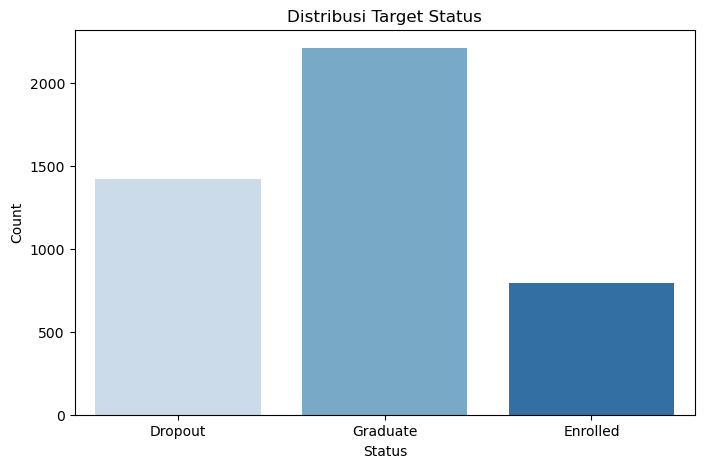

In [14]:
# Visualisasi Distribusi fitur Status 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Status', palette="Blues")
plt.title("Distribusi Target Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

In [15]:
# Menghitung distribusi fitur Status dalam prosentase
df['Status'].value_counts(normalize=True) * 100

Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64

**Note Hasil Analisis Distribusi Target**

Distribusi Target (`Status`)
- Graduate: 49.93%
- Dropout: 32.12%
- Enrolled : 17.95%
  
Artinya,  hampir setengah dari jumlahmahasiswa lulus dari pendidikan, tetapi `Dropout` dan `enrolled` tetap tinggi pada **32.12%** dan **17.95%**mahasiswa

### Analisis Fitur Numerik

In [16]:
# Distribusi Variabel Numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns = list(set(numerical_columns) - set(categorical_columns))

In [17]:
# Menampilkan ringkasan statistik deskriptif dari fitur-fitur numerik
numerical_description = df[numerical_columns].describe()
numerical_description

,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_grade,Age_at_enrollment,Curricular_units_1st_sem_approved,Application_order,Curricular_units_2nd_sem_credited,Inflation_rate,Curricular_units_2nd_sem_without_evaluations,Previous_qualification_grade,Curricular_units_2nd_sem_approved,Curricular_units_1st_sem_without_evaluations,Curricular_units_1st_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,GDP,Admission_grade,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Unemployment_rate
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,10.230206,10.640822,23.265145,4.706600,1.727848,0.541817,1.228029,0.150316,132.613314,4.435805,0.137658,0.709991,6.232143,8.063291,0.001969,126.978119,6.270570,8.299051,11.566139
std,5.210808,4.843663,7.587816,3.094238,1.313793,1.918546,1.382711,0.753774,13.188332,3.014764,0.690880,2.360507,2.195951,3.947951,2.269935,14.482001,2.480178,4.179106,2.663850
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,-0.800000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.060000,95.000000,0.000000,0.000000,7.600000
25%,10.750000,11.000000,19.000000,3.000000,1.000000,0.000000,0.300000,0.000000,125.000000,2.000000,0.000000,0.000000,5.000000,6.000000,-1.700000,117.900000,5.000000,6.000000,9.400000
50%,12.200000,12.285714,20.000000,5.000000,1.000000,0.000000,1.400000,0.000000,133.100000,5.000000,0.000000,0.000000,6.000000,8.000000,0.320000,126.100000,6.000000,8.000000,11.100000
75%,13.333333,13.400000,25.000000,6.000000,2.000000,0.000000,2.600000,0.000000,140.000000,6.000000,0.000000,0.000000,7.000000,10.000000,1.790000,134.800000,7.000000,10.000000,13.900000
max,18.571429,18.875000,70.000000,26.000000,9.000000,19.000000,3.700000,12.000000,190.000000,20.000000,12.000000,20.000000,23.000000,33.000000,3.510000,190.000000,26.000000,45.000000,16.200000


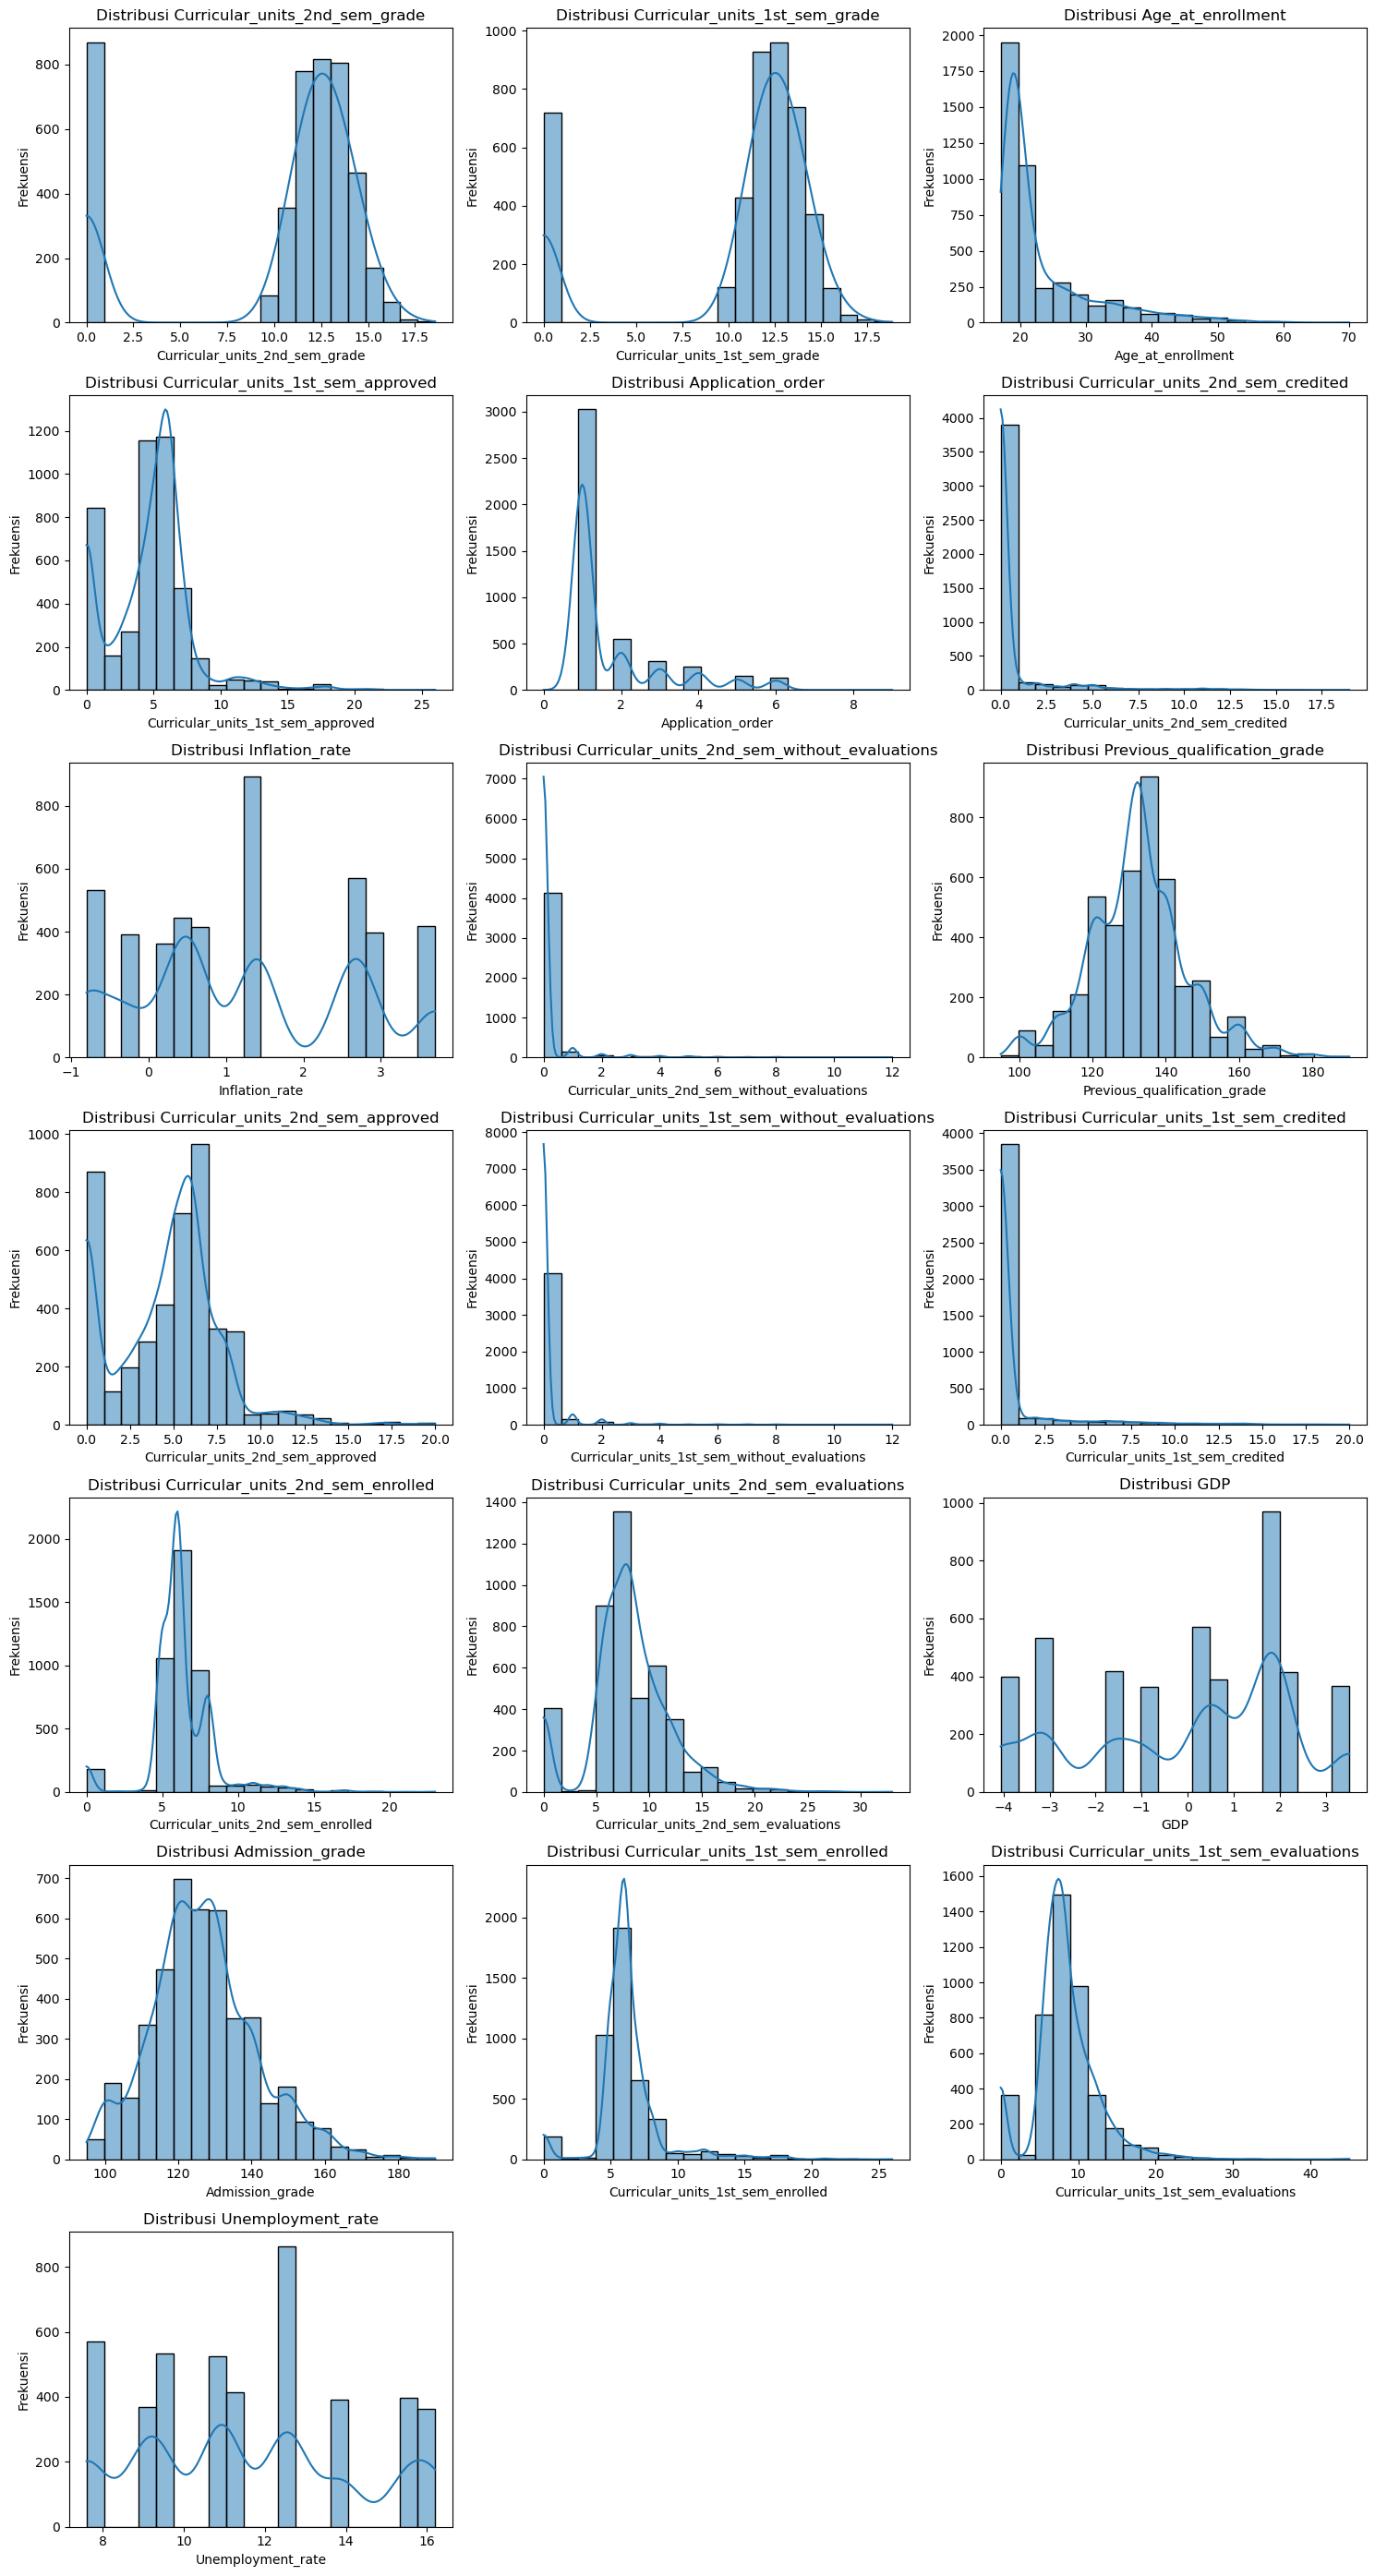

In [18]:
# Visualisasi Distribusi Kolom Numerik
n_cols = 3  # Number of columns for subplots (adjust as needed)
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols != 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
axes = axes.ravel()

for i, col in enumerate(numerical_columns): 
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Beberapa Distribusi Kolom Numerik**:
- Curricular_units_1st_sem_approved : Rata-rata units semester 1 yang disetujui adalah 4.7 units, maksimal 26 units, dan minimal 0
- Curricular_units_1st_sem_grade : Rata-rata grade pada semester 1 yaitu  harian adalah 10.6, maksimal 18.87 dan minimal 0
- Admission_grade: Dari rentang 0-200, rata-rata admission grademahasiswa yaitu 126, maksimal 190 dan minimal 95
- Application_order : Dari urutan 1 - 9, rata-rata application ordermahasiswa 1.7, maksimal 9 dan minimal 0
- Age_at_enrollment : Rata-rata usiamahasiswa saat enrollment adalah 23, maksimal 70 dan minimal 17
- Unemployment_rate : Rata-rata Unemployment_ratemahasiswa adalah 11.5, maksimal 16.2 dan minimal 7.6

### Analisis Hubungan beberapa fitur terhadap target `Status`

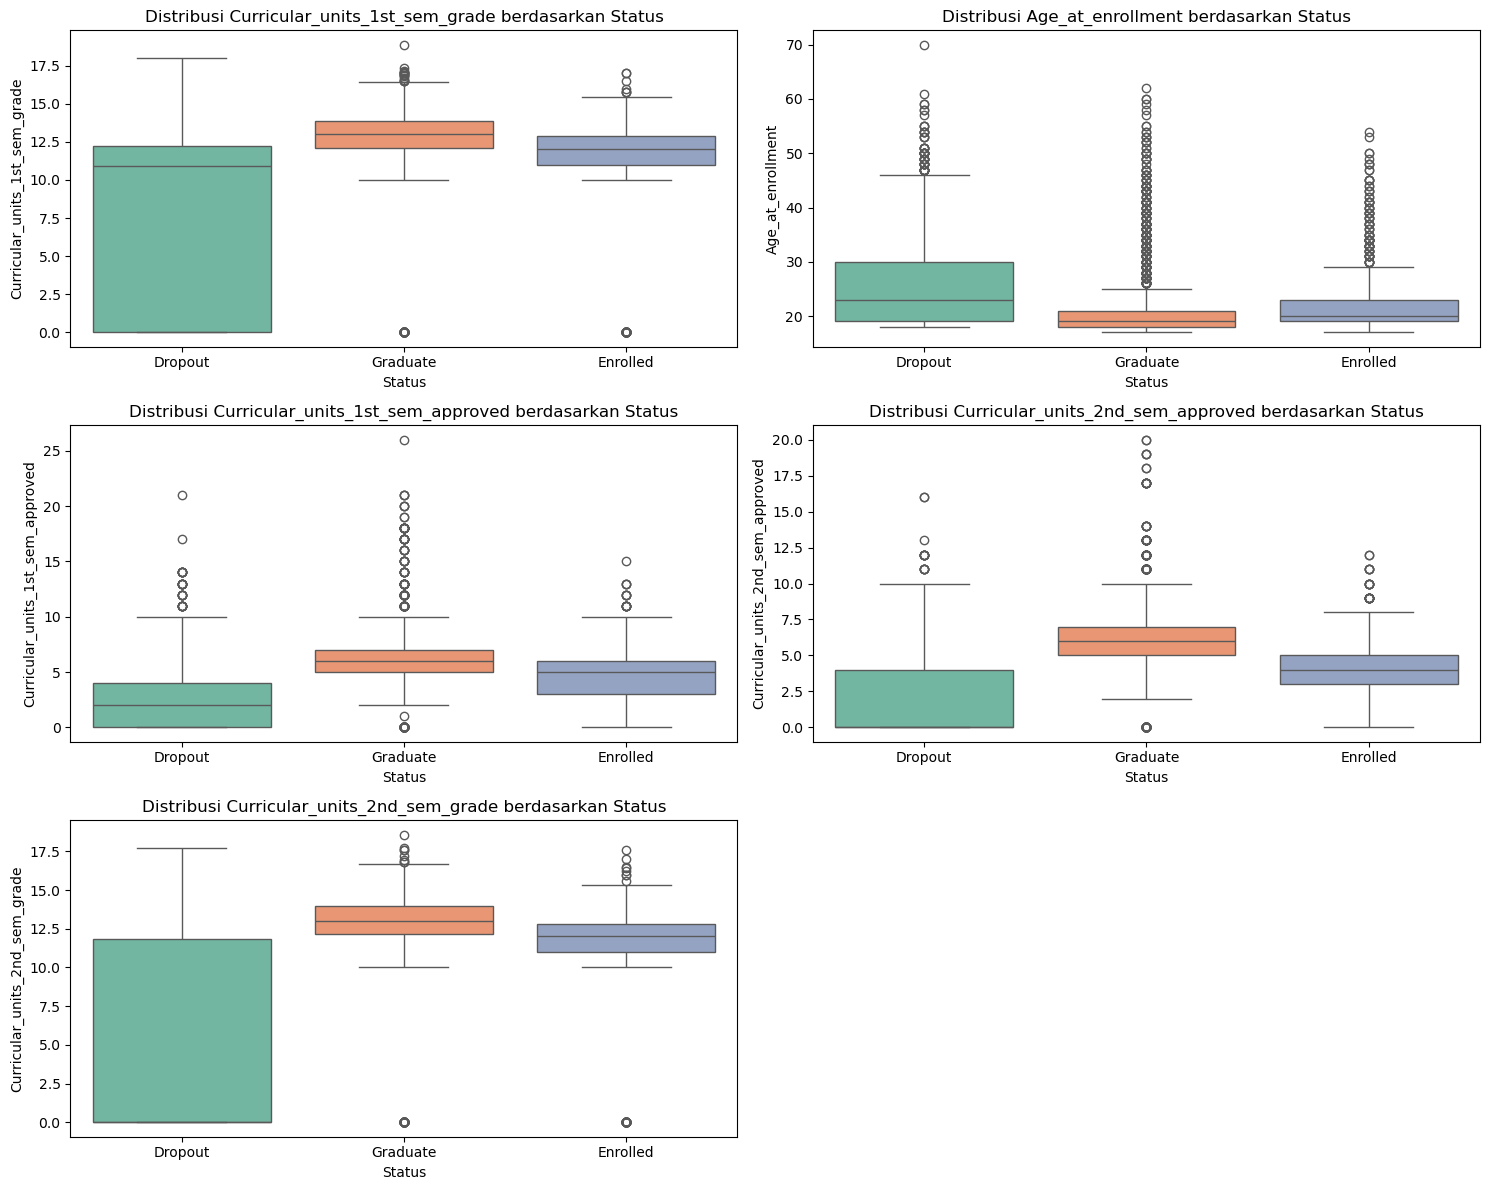

In [19]:
# Memvisualisasikan distribusi data pada kolom-kolom pada pandas train
set_columns = ['Curricular_units_1st_sem_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
              'Curricular_units_2nd_sem_grade']
n_cols = 2
n_rows = len(set_columns) // n_cols + (len(set_columns) % n_cols != 0)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
axs = axs.ravel()

for i, column in enumerate(set_columns):
    sns.boxplot(data=df, x='Status', y=column, hue='Status', palette="Set2", ax = axs[i])
    axs[i].set_title('Distribusi {} berdasarkan Status'.format(column))
    axs[i].set_xlabel("Status")
    axs[i].set_ylabel(column)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

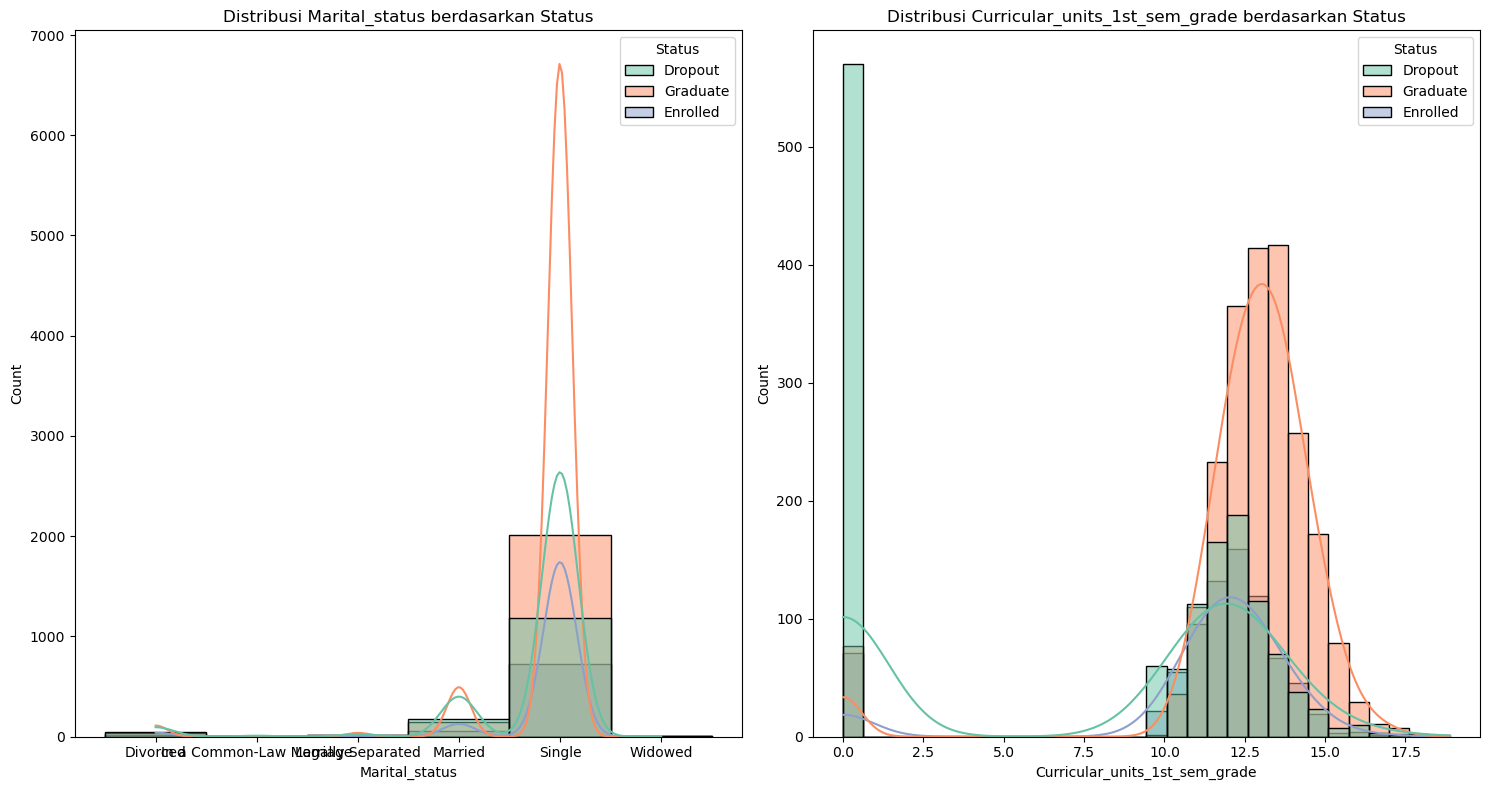

In [20]:
# Memvisualisasikan distribusi data pada kolom-kolom pada pandas train
columns = ["Marital_status", "Curricular_units_1st_sem_grade"]
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs = axs.ravel()

for i, column in enumerate(columns):
    sns.histplot(data=df_categorical, x=column, hue="Status", kde=True, palette="Set2", bins=30, ax=axs[i])
    axs[i].set_title('Distribusi {} berdasarkan Status'.format(column))
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Count")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        
plt.tight_layout()
plt.show()

**Note Hasil Analisis Beberapa Fitur**

  - Kolom `Age_at_enrollment`:mahasiswa dengan `Status Dropout` cenderung lebih tua ketika mendaftar dibandingkanmahasiswa yang graduate.
  - Kolom `Curricular_units_1st_sem_grade`:mahasiswa dengan `Status Dropout` memiliki jumlah units yang lebih rendah dibandingkanmahasiswa yang graduate.
  - Kolom `Curricular_units_2nd_sem_grade`:mahasiswa dengan `Status Dropout` memiliki jumlah units yang lebih rendah dibandingkanmahasiswa yang graduate.
  - Kolom `Curricular_units_1nd_sem_approved` :mahasiswa dengan `Status Dropout` memiliki jumlah approved units yang lebih rendah dibandingkanmahasiswa yang graduate.
  - Kolom `Curricular_units_2nd_sem_approved` :mahasiswa dengan `Status Dropout` memiliki jumlah approved units yang lebih rendah dibandingkanmahasiswa yang graduate.

### Analisis Interaksi Antar Fitur

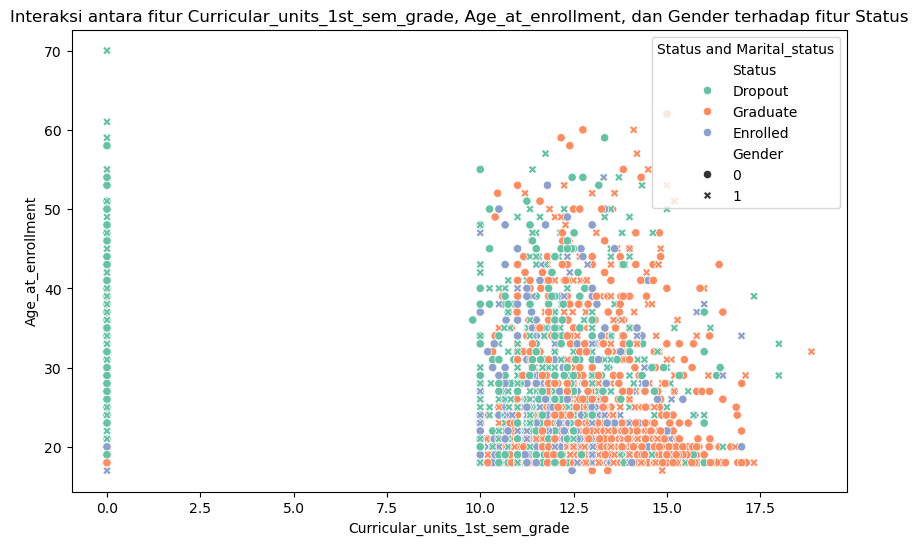

In [21]:
# Visualisasi interaksi antara MonthlyIncome dan OverTime terhadap Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Curricular_units_1st_sem_grade", y="Age_at_enrollment", hue="Status", style="Gender", palette="Set2")
plt.title("Interaksi antara fitur Curricular_units_1st_sem_grade, Age_at_enrollment, dan Gender terhadap fitur Status")
plt.xlabel("Curricular_units_1st_sem_grade")
plt.ylabel("Age_at_enrollment")
plt.legend(title="Status and Marital_status")
plt.show()

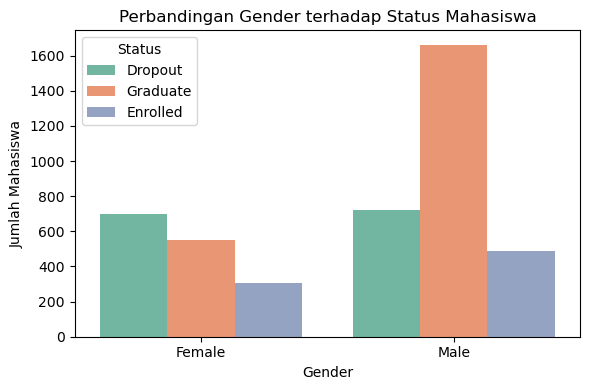

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_categorical, x='Gender', hue='Status', palette='Set2')
plt.title('Perbandingan Gender terhadap Status Mahasiswa')
plt.xlabel('Gender')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

**Note Analisis Interaksi Fitur**:

Gambar di atas menunjukkan interaksi antara kolom `Age_at_enrollment`, `Gender` dan `Curricular_units_1st_sem_grade` terhadap `Status`

1. `Status` dan `Age_at_enrollment`
      - Mahasiswa yang dropout cenderung memiliki variasi usia yang lebih luas, termasuk banyak yang berada di rentang usia lebih tinggi (di atas 30 tahun), dibandingkan yang lulus.
      - Mahasiswa yang graduate lebih terkonsentrasi di usia muda (sekitar 18–25 tahun), yang merupakan usia ideal masuk perguruan tinggi.

2. `Status` dan `Gender`
      - Tampak tidak ada perbedaan pola visual yang sangat jelas antara simbol o (0) dan x (1), menunjukkan bahwa gender mungkin bukan faktor dominan dalam menentukan dropout vs graduate pada visual ini.
      - Bahkan pada grafik Perbandingan Gender terhadap Status Mahasiswa tidak ada perbandingan grafik yang signifikan dari `Status Dropout`
        
3. `Status` dan `Curricular_units_1st_sem_grade`
   - Mahasiswa yang mendapatkan nilai rendah di semester pertama (di bawah 10) lebih banyak berasal dari kelompok dropout.
   - Sebaliknya, mahasiswa dengan nilai tinggi (12 ke atas) lebih banyak berada di kelompok graduate, menandakan kinerja akademik awal berkorelasi dengan kelulusan.
    
4. Interaksi Ketiga Variabel
      - Mahasiswa yang cenderung lebih tua dengan nilai pada semester satu yang rendah Status Dropout yang lebih tinggi, namun gender tidak mempengaruhi

Dari visualisasi scatterplot MonthlyIncome vs Age dengan pengaruh OverTime dan Status:
1. `Age_at_enrollment`: mahasiswa dengan usia saat pendaftaran lebih tua cenderung memiliki Status Dropout lebih tinggi (ditunjukkan oleh titik berwarna hijau diposisi atas grafik).
2. `Curricular_units_1st_sem_grade`: mahasiswa yang memiliki nilai semester satu yang buruk, terutama jika usia mereka lebih tua cenderung memiliki Status Dropout (ditunjukkan oleh titik berwarna hijau di pojok kiri grafik)

**Insight**

Mahasiswa dengan usia pendaftaran yang lebih tua dan nilai akademik awal yang rendah cenderung memiliki kemungkinan dropout yang lebih tinggi, menunjukkan bahwa faktor usia dan performa awal berperan signifikan dalam keberhasilan studi.

### Analisis Kondisi Sosial-Ekonomi Mahasiswa

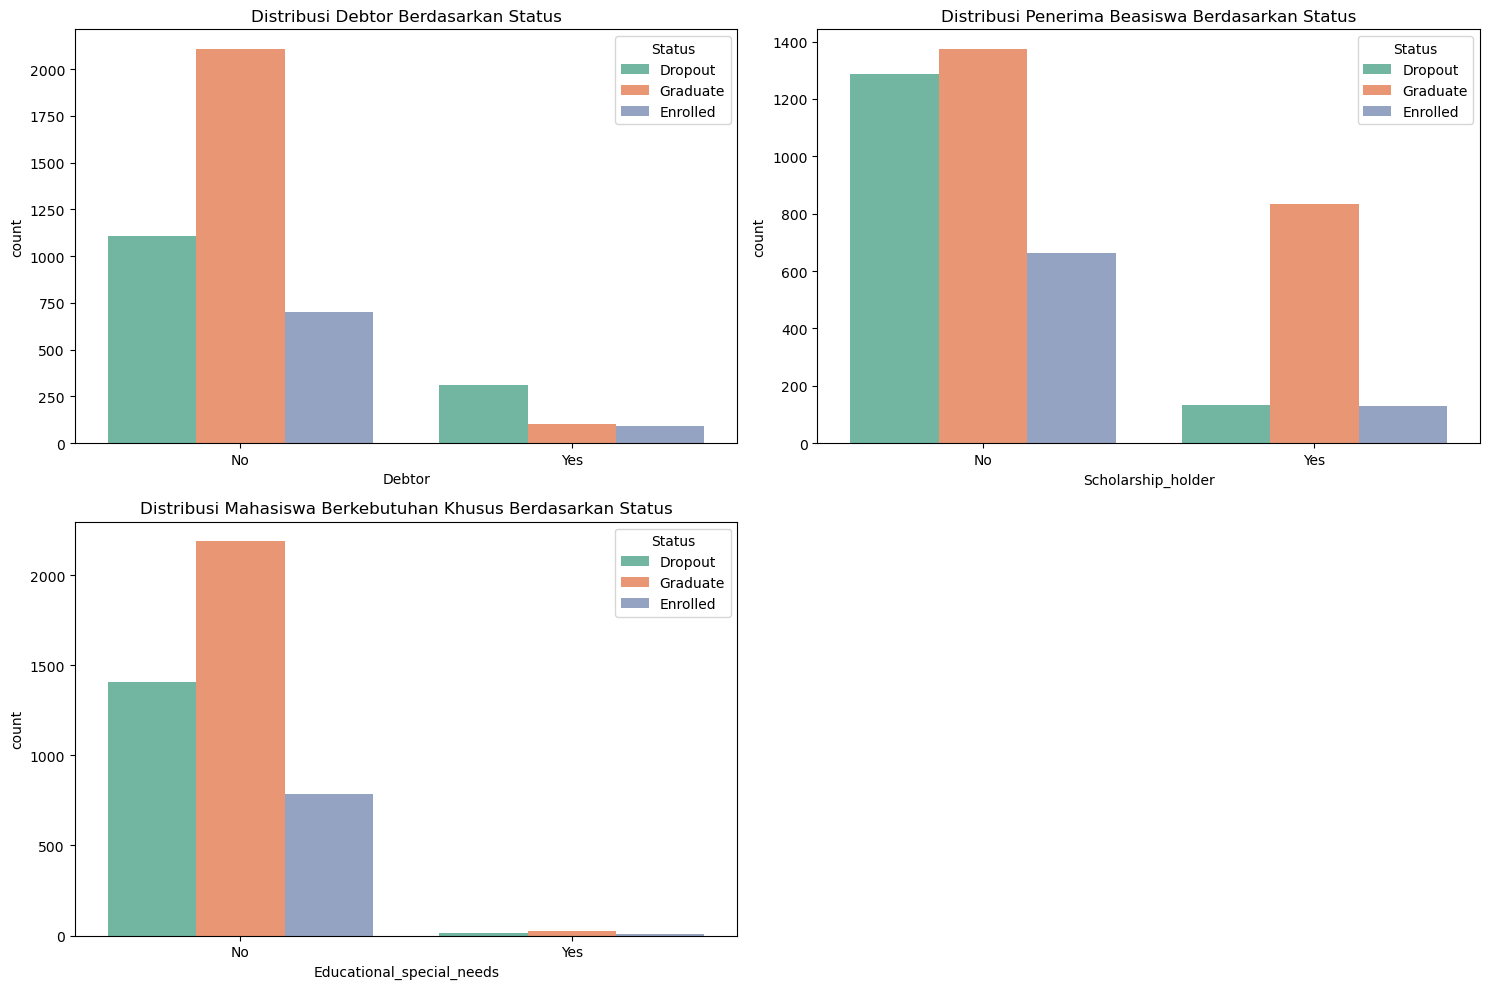

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Visualisasi 1: Debtor
sns.countplot(data=df_categorical, x='Debtor', hue='Status', palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Debtor Berdasarkan Status')

# Visualisasi 2: Scholarship_holder
sns.countplot(data=df_categorical, x='Scholarship_holder', hue='Status', palette="Set2", ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Penerima Beasiswa Berdasarkan Status')

# Visualisasi 3: Educational_special_needs
sns.countplot(data=df_categorical, x='Educational_special_needs', hue='Status', palette="Set2", ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Mahasiswa Berkebutuhan Khusus Berdasarkan Status')

# Kosongkan subplot ke-4
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Analisis Hubungan Fitur Kategorikal terhadap Target `Status`

In [24]:
# Menampilkan matrix korelasi antar fitur numerik
correlation_matrix = df[categorical_columns].corr()
print(correlation_matrix)

                            Marital_status  Application_mode    Course  \
Marital_status                    1.000000          0.264006  0.046365   
Application_mode                  0.264006          1.000000  0.065385   
Course                            0.046365          0.065385  1.000000   
Daytime_evening_attendance       -0.274939         -0.304092 -0.043151   
Previous_qualification            0.062529          0.422411  0.006654   
Nacionality                      -0.008843         -0.000661 -0.033923   
Mothers_qualification             0.193163          0.118974  0.054543   
Fathers_qualification             0.130353          0.083276  0.050724   
Mothers_occupation                0.034994          0.051600  0.031265   
Fathers_occupation                0.031609          0.036707  0.028881   
Displaced                        -0.234886         -0.301197 -0.087399   
Educational_special_needs        -0.028343         -0.030779 -0.018795   
Debtor                            0.03

**Analisa Hubungan Menggunakan Chi-Square Test**

In [25]:
# Memproses analisis hubungan antar fitur dengan metode Chi-Square Test
chi_square_results = []
for feature in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        "Feature": feature,
        "Chi-Square Statistic": chi2,
        "p-value": p
    })

In [26]:
# Mengubah output menjadi dataframe agar mudah dilihat dan dipahami
chi_square_df = pd.DataFrame(chi_square_results)

In [27]:
chi_square_df

,Feature,Chi-Square Statistic,p-value
0,Marital_status,63.438549,8.054280e-10
1,Application_mode,466.513683,1.964657e-77
2,Course,558.284474,2.316571e-97
3,Daytime_evening_attendance,28.739937,5.743834e-07
4,Previous_qualification,219.680709,7.160305e-30
5,Nacionality,45.857525,2.422255e-01
6,Mothers_qualification,217.952131,5.823844e-21
7,Fathers_qualification,225.000783,3.175007e-19
8,Mothers_occupation,291.921705,1.630859e-31
9,Fathers_occupation,264.499848,4.515439e-19


**Hasil Chi-Square Test**

1. Fitur Signifikan terhadap Status (p-value < 0.05):
    Artinya, fitur ini secara statistik memiliki hubungan signifikan terhadap status akhir mahasiswa.
    - **Marital_status** : Status pernikahan berpengaruh terhadap kelulusan. Mahasiswa yang menikah atau single menunjukkan distribusi berbeda terhadap status dropout/graduate.
    - **Application_mode** : Cara pendaftaran (misalnya online, jalur khusus) sangat berpengaruh terhadap status akhir.
    - **Course** : Program studi memiliki pengaruh sangat signifikan terhadap kemungkinan dropout atau kelulusan.
    - **Daytime_evening_attendance** : Waktu kuliah (pagi vs malam) berkorelasi dengan status mahasiswa, mungkin terkait beban kerja.
    - **Previous_qualification** : Latar belakang pendidikan sebelumnya memengaruhi kelulusan, menunjukkan kesiapan awal penting.
    - **Mothers_qualification & Fathers_qualification** : Tingkat pendidikan orang tua berkorelasi signifikan dengan keberhasilan akademik anak.
    - **Mothers_occupation & Fathers_occupation** : Pekerjaan orang tua memiliki hubungan signifikan terhadap status mahasiswa.
    - **Displaced** : Mahasiswa yang berasal dari wilayah terdampak atau dipindahkan menunjukkan risiko dropout yang lebih tinggi.
    - **Debtor** : Mahasiswa yang memiliki utang pendidikan lebih rentan terhadap dropout.
    - **Tuition_fees_up_to_date** : Keterlambatan pembayaran biaya kuliah memiliki pengaruh sangat besar terhadap status mahasiswa.
    - **Gender** : Jenis kelamin juga menunjukkan hubungan signifikan terhadap status akademik.
    - **Scholarship_holder** : Mahasiswa penerima beasiswa cenderung memiliki hasil akademik yang berbeda secara signifikan.

2. Fitur Tidak Signifikan terhadap Status (p-value >= 0.05):
    Artinya, tidak ada hubungan yang terbukti secara statistik terhadap status akhir mahasiswa.

    - **Educational_special_needs** : Mahasiswa dengan kebutuhan khusus tidak menunjukkan perbedaan signifikan dalam status akademik.
    - **International** : Status sebagai mahasiswa internasional atau lokal tidak menunjukkan pengaruh signifikan terhadap kelulusan.
    - **Nacionality** : Kewarganegaraan tidak memiliki pengaruh signifikan terhadap status akademik dalam populasi dataset ini.

#### Distribusi Kolom Kategorikal

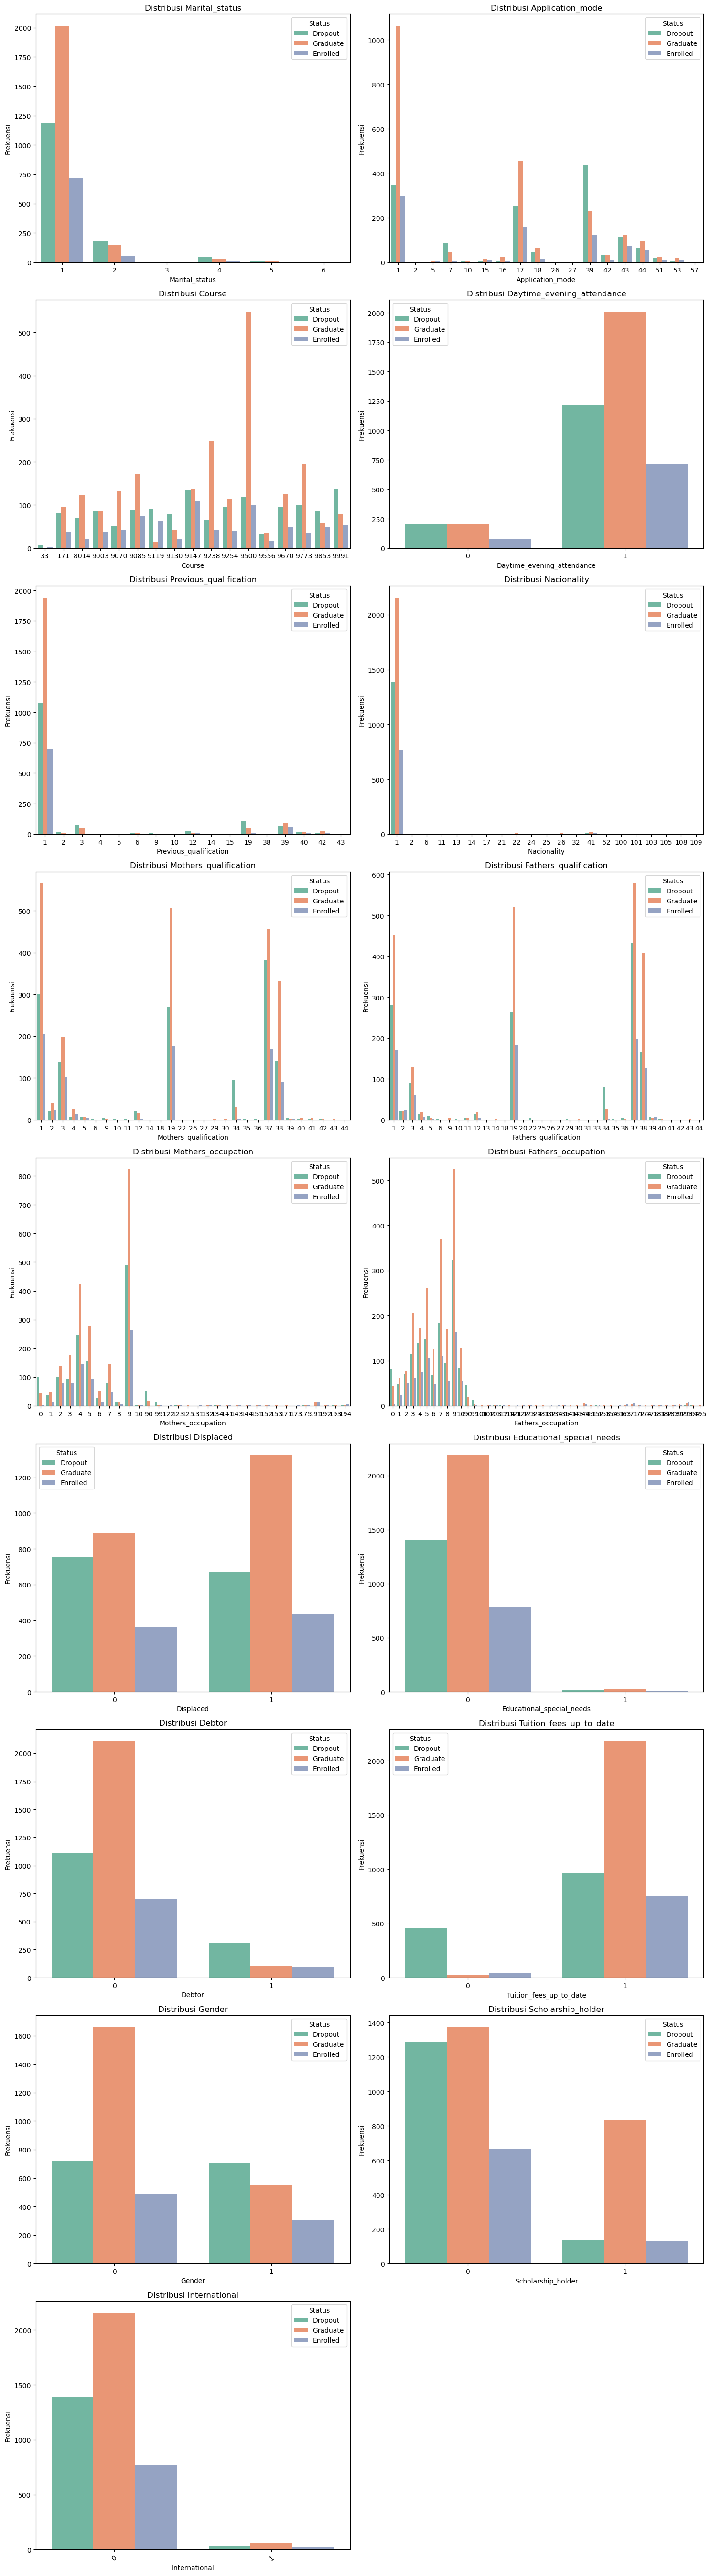

In [28]:
# Visualisasi Distribusi Kolom Kategorikal
n_cols = 2  # Number of columns for subplots (adjust as needed)
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols != 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 6))
axes = axes.ravel()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df,  x=col, hue='Status', palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')    

# Remove unused axes 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.xticks(rotation=40) 
plt.tight_layout()
plt.show()

Dari Grafik diatas, berikut beberapa insight yang diperoleh:
1. **Marital_status** : Mahasiswa single lebih dominan mengalami dropout dibandingkan yang menikah.
2. **Daytime_evening_attendance** : Mahasiswa yang mengikuti kuliah malam (evening) memiliki proporsi dropout yang lebih tinggi dibandingkan mahasiswa kelas pagi.
3. **Displaced** : Mahasiswa yang berasal dari wilayah terdampak (displaced) cenderung lebih banyak yang dropout dibandingkan yang tidak.
4. **Educational_special_needs** : Mahasiswa dengan kebutuhan khusus memiliki distribusi status yang hampir merata dan tidak menunjukkan kecenderungan dropout yang signifikan.
5. **Debtor** : Mahasiswa yang memiliki utang pendidikan (Debtor = 1) menunjukkan proporsi dropout yang jauh lebih tinggi dibandingkan yang tidak berutang.
6. **Tuition_fees_up_to_date** : Mahasiswa yang tidak membayar biaya kuliah tepat waktu secara dominan mengalami dropout.
7. **Gender** : Tidak terdapat perbedaan signifikan antar gender dalam hal status kelulusan, distribusinya relatif seimbang.
8. **Scholarship_holder** : Mahasiswa penerima beasiswa lebih banyak yang lulus dibandingkan yang tidak menerima beasiswa.
9. **International** : Status mahasiswa internasional tidak menunjukkan perbedaan mencolok terhadap status kelulusan dibanding mahasiswa lokal.

### Korelasi Antar Variabel

#### Korelasi Numerik

In [29]:
status_map = {"Graduate" : 0, "Dropout" : 1, "Enrolled":2}
df["Status_code"] = df["Status"].replace(status_map)
numerical_columns.append("Status_code")

In [30]:
# Menganalisis matrix korelasi antar fitur-fitur numerik
correlation_matrix = df[numerical_columns].corr()

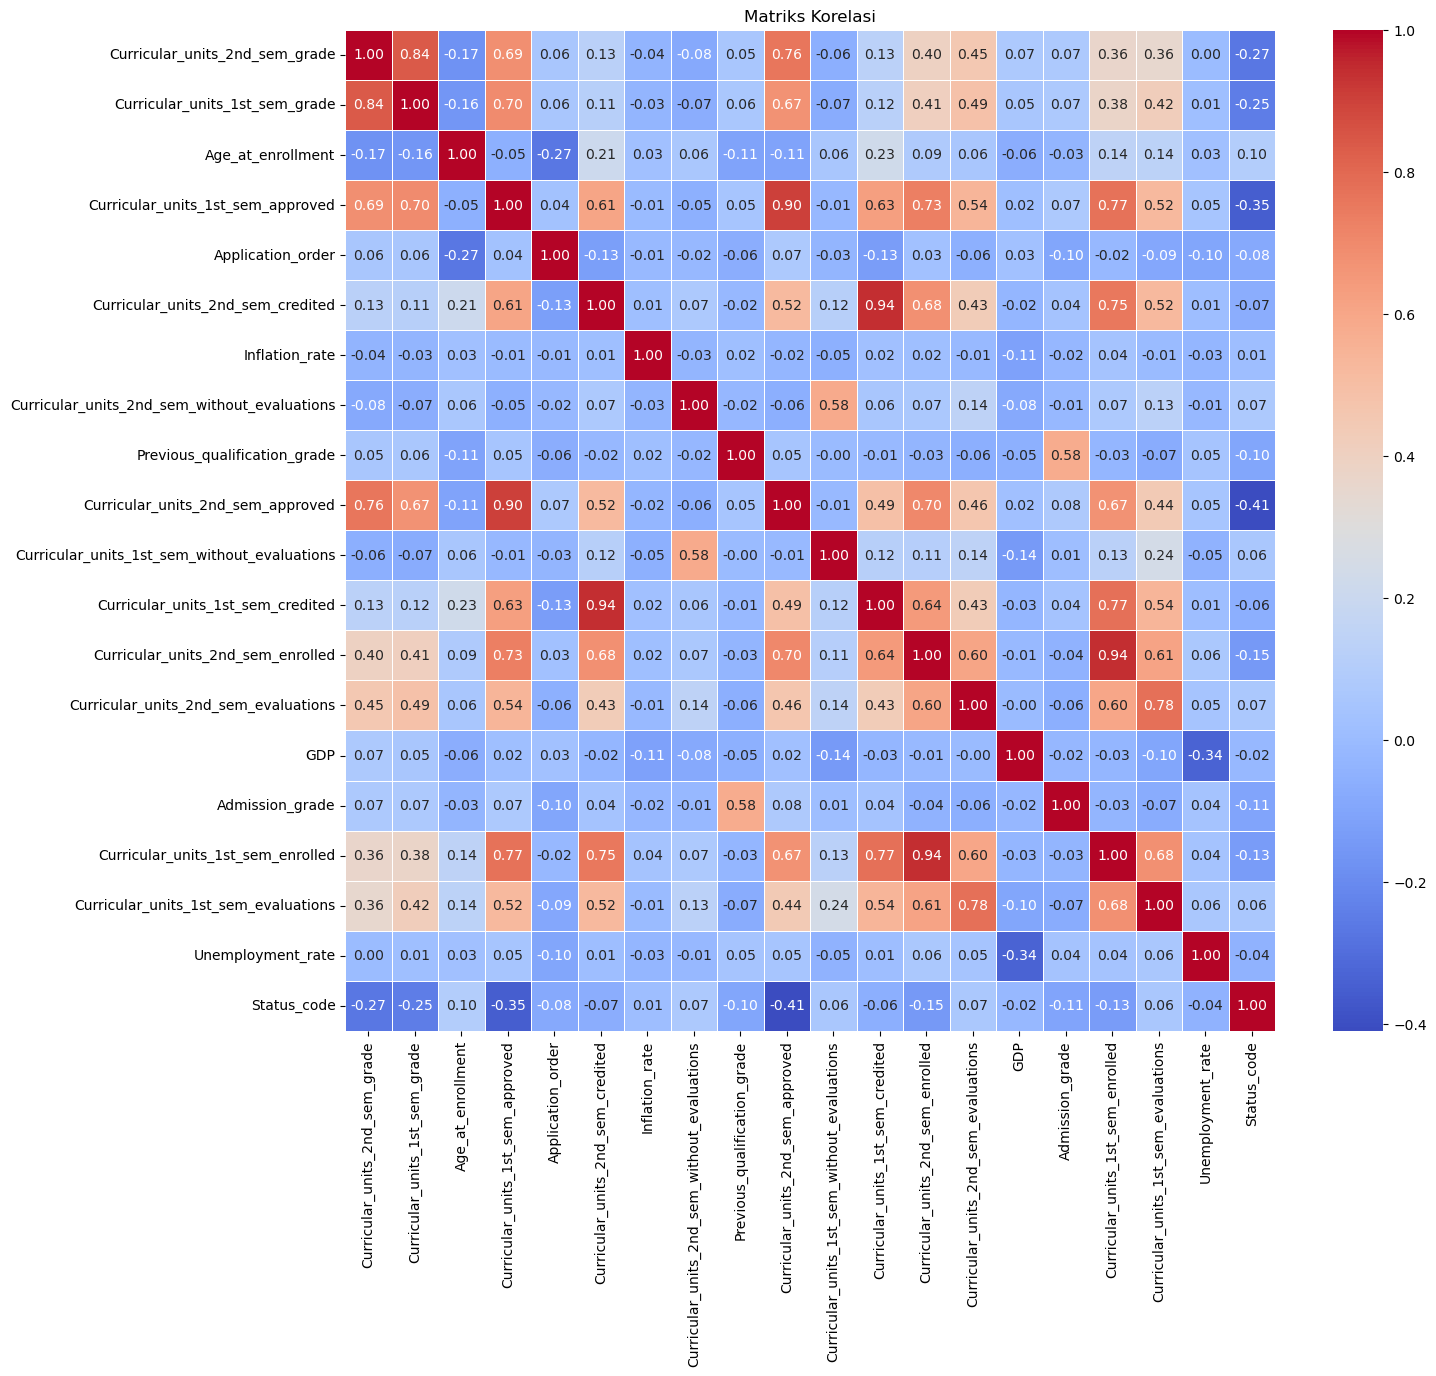

In [31]:
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

**Note hasil Matriks Korelasi**:
1. `Curricular_units_1st_sem_credited` sangat berkorelasi dengan:
    - Curricular_units_1st_sem_approved (r = 0.94)
    - Curricular_units_2nd_sem_credited (r = 0.94)
    - Curricular_units_2nd_sem_approved (r = 0.91)
    - Ini menunjukkan bahwa mahasiswa yang berhasil di semester 1 cenderung juga sukses di semester 2
2. `Curricular_units_1st_sem_evaluations` dan `2nd_sem_evaluations` berkorelasi positif dengan *_enrolled dan *_approved. Artinya, semakin banyak mata kuliah yang dievaluasi, semakin besar kemungkinan mahasiswa lulus (korelasi dengan performa)
3. Hampir semua fitur memiliki korelasi lemah terhadap `Status_code` (numerik status mahasiswa) dengan semua korelasi di bawah 0.2. Ini menunjukkan bahwa tidak ada satu fitur numerik tunggal yang secara kuat memprediksi status mahasiswa (Dropout/Graduate/Enrolled), perlu kombinasi fitur atau model kompleks.
4. `GDP, Inflation_rate, Unemployment_rate` memiliki korelasi rendah (< 0.1) terhadap performa akademik dan status, menandakan faktor makro ekonomi tidak terlalu berpengaruh langsung dalam data ini.
5. `Curricular_units_1st_sem_grade` dan `2nd_sem_grade` memiliki korelasi tinggi dengan kolom *_approved (r > 0.7). Menegaskan bahwa nilai akademik berbanding lurus dengan tingkat kelulusan mata kuliah.

#### Korelasi Kategorikal

In [33]:
# Cramér's V untuk analisis korelasi fitur kategori dan Status
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v_results = []
categorical_columns.append("Status_code")

for i, feature_a in enumerate(categorical_columns):
    for feature_b in categorical_columns[i+1:]:
        confusion_matrix = pd.crosstab(df[feature_a], df[feature_b])
        cramers_v_score = cramers_v(confusion_matrix)
        cramers_v_results.append({
            "Feature A": feature_a,
            "Feature B": feature_b,
            "Cramér's V": cramers_v_score
        })
cramers_v_df = pd.DataFrame(cramers_v_results)

In [34]:
# Menampilkan pandas cramers_v_df
cramers_v_df

,Feature A,Feature B,Cramér's V
0,Marital_status,Application_mode,Application_mode 1 0.373835 2 8.9199...
1,Marital_status,Course,Course 33 3.410101 171 0.805635 8014 ...
2,Marital_status,Daytime_evening_attendance,Daytime_evening_attendance 0 1.111697 1 ...
3,Marital_status,Previous_qualification,Previous_qualification 1 0.181042 2 ...
4,Marital_status,Nacionality,Nacionality 1 0.035856 2 1.665279 6 ...
...,...,...,...
148,Gender,International,International 0 0.025210 1 0.157879 dtyp...
149,Gender,Status_code,Status_code 0 0.324959 1 0.405162 2 0...
150,Scholarship_holder,International,International 0 0.026625 1 0.166737 dtyp...
151,Scholarship_holder,Status_code,Status_code 0 0.430788 1 0.537112 2 0...


In [35]:
# Ekstrak nilai maksimum dari kolom "Cramér's V" untuk setiap baris
cramers_v_df['Max Cramér\'s V'] = cramers_v_df['Cramér\'s V'].apply(lambda x: x.max() if isinstance(x, pd.Series) else x)

In [37]:
# Menampilkan pandas cramers_v_df yang sudah diekstrak nilai maksimum setiap baris
cramers_v_df

,Feature A,Feature B,Cramér's V,Max Cramér's V
0,Marital_status,Application_mode,Application_mode 1 0.373835 2 8.9199...,15.449838
1,Marital_status,Course,Course 33 3.410101 171 0.805635 8014 ...,3.410101
2,Marital_status,Daytime_evening_attendance,Daytime_evening_attendance 0 1.111697 1 ...,1.111697
3,Marital_status,Previous_qualification,Previous_qualification 1 0.181042 2 ...,11.037641
4,Marital_status,Nacionality,Nacionality 1 0.035856 2 1.665279 6 ...,2.355061
...,...,...,...,...
148,Gender,International,International 0 0.025210 1 0.157879 dtyp...,0.157879
149,Gender,Status_code,Status_code 0 0.324959 1 0.405162 2 0...,0.542021
150,Scholarship_holder,International,International 0 0.026625 1 0.166737 dtyp...,0.166737
151,Scholarship_holder,Status_code,Status_code 0 0.430788 1 0.537112 2 0...,0.718541


### Menangani Missing value

In [39]:
# Menyimpan data missing value pada fitur Status untuk menjadi data test
df_test = df[df["Status_code"] == 2]
df_used =  df[df["Status_code"] != 2]
df_clean =  df[df["Status_code"] != 2]

In [40]:
# Convert Status menjadi int (0 atau 1)
df_test['Status'].value_counts()

Status
Enrolled    794
Name: count, dtype: int64

In [41]:
# Menampilkan 5 row teratas data dari pandas df_clean
df_clean.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_code
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


### Encoding Fitur Kategorikal

In [42]:
# Memilih fitur berdasarkan score Chi-Square
significant_categorical_features = chi_square_df[chi_square_df['p-value'] < 0.05]['Feature'].tolist()
print("Fitur kategorikal signifikan berdasarkan Chi-Square Test:", significant_categorical_features)

Fitur kategorikal signifikan berdasarkan Chi-Square Test: ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']


In [43]:
# Memilih fitur dengan hubungan kuat terhadap target Status (Cramér's V > 0.5)
categorical_features_validated = []
for feature in significant_categorical_features:
    match = cramers_v_df[
        ((cramers_v_df['Feature A'] == feature) & (cramers_v_df['Feature B'] == 'Status_code')) |
        ((cramers_v_df['Feature B'] == feature) & (cramers_v_df['Feature A'] == 'Status_code'))
    ]
    if not match.empty:  # Jika ada match
        cramers_value = match['Max Cramér\'s V'].values[0]
        if cramers_value > 0.5:  # Cek threshold
            categorical_features_validated.append(feature)
print("Fitur kategorikal setelah validasi Cramér's V terhadap target:", categorical_features_validated)

Fitur kategorikal setelah validasi Cramér's V terhadap target: ['Application_mode', 'Course', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']


In [44]:
# Memfilter fitur untuk modeling
df_filtered = df_clean[categorical_features_validated + numerical_columns + ['Status']]
df_filtered.head()

,Application_mode,Course,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_grade,Age_at_enrollment,Curricular_units_1st_sem_approved,...,Curricular_units_1st_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,GDP,Admission_grade,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Unemployment_rate,Status_code,Status
0,17,171,0,1,1,0,0.000000,0.000000,20,0,...,0,0,0,1.74,127.3,0,0,10.8,1,Dropout
1,15,9254,0,0,1,0,13.666667,14.000000,19,6,...,0,6,6,0.79,142.5,6,6,13.9,0,Graduate
2,1,9070,0,0,1,0,0.000000,0.000000,19,0,...,0,6,0,1.74,124.8,6,0,10.8,1,Dropout
3,17,9773,0,1,0,0,12.400000,13.428571,20,6,...,0,6,10,-3.12,119.6,6,8,9.4,0,Graduate
4,39,8014,0,1,0,0,13.000000,12.333333,45,5,...,0,6,6,0.79,141.5,6,9,13.9,0,Graduate


In [45]:
df_filtered["Status"].value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [46]:
categorical_features_validated

['Application_mode',
 'Course',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder']

In [47]:
# Encoding Fitur Kategorikal
encoder = LabelEncoder()
for feature in categorical_features_validated:
    df_filtered[feature] = encoder.fit_transform(df_filtered[feature])
df_filtered[categorical_features_validated].head()

,Application_mode,Course,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder
0,7,1,0,1,1,0
1,5,10,0,0,1,0
2,0,4,0,0,1,0
3,7,14,0,1,0,0
4,11,2,0,1,0,0


### Scaling Fitur Numerik

In [48]:
# Menyelaraskan skala fitur numerik pada pandas df_clean
scaler = MinMaxScaler()
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

In [49]:
# Menampilkan 5 row teratas data dari pandas df_clean
df_clean.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_code
0,1,17,0.833333,171,1,1,0.284211,1,19,12,...,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout,1.0
1,1,15,0.166667,9254,1,1,0.684211,1,1,3,...,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,Graduate,0.0
2,1,1,0.833333,9070,1,1,0.284211,1,37,37,...,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout,1.0
3,1,17,0.333333,9773,1,1,0.284211,1,38,37,...,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,Graduate,0.0
4,2,39,0.166667,8014,0,1,0.052632,1,37,38,...,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,Graduate,0.0


In [50]:
# Menampilkan ringkasan pandas df_clean dengan cepat
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                3630 non-null   category
 1   Application_mode                              3630 non-null   category
 2   Application_order                             3630 non-null   float64 
 3   Course                                        3630 non-null   category
 4   Daytime_evening_attendance                    3630 non-null   category
 5   Previous_qualification                        3630 non-null   category
 6   Previous_qualification_grade                  3630 non-null   float64 
 7   Nacionality                                   3630 non-null   category
 8   Mothers_qualification                         3630 non-null   category
 9   Fathers_qualification                         3630 non-nu

In [51]:
# Menampilkan missing value dari fitur-fitur pandas df_clean
df_clean.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [52]:
# Menampilkan ringkasan statistik deskriptif dari pandas df_clean
df_clean.describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_code
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.291690,0.399164,0.339936,0.121909,0.037713,0.243749,0.179357,0.184287,0.558138,0.010744,0.030622,0.273757,0.235245,0.225923,0.540408,0.011846,0.468646,0.451466,0.535105,0.391460
std,0.222305,0.139351,0.153803,0.147698,0.123864,0.098876,0.095258,0.124533,0.267957,0.056593,0.106457,0.098392,0.120126,0.158119,0.295171,0.062306,0.310192,0.307758,0.298545,0.488144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.315789,0.242105,0.037736,0.000000,0.192308,0.133333,0.115385,0.582781,0.000000,0.000000,0.217391,0.181818,0.100000,0.566346,0.000000,0.209302,0.244444,0.311757,0.000000
50%,0.166667,0.401053,0.331579,0.056604,0.000000,0.230769,0.177778,0.192308,0.653851,0.000000,0.000000,0.260870,0.242424,0.250000,0.664103,0.000000,0.406977,0.488889,0.578600,0.000000
75%,0.333333,0.473684,0.422105,0.150943,0.000000,0.269231,0.222222,0.230769,0.715232,0.000000,0.000000,0.304348,0.303030,0.300000,0.726923,0.000000,0.732558,0.755556,0.772787,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Melakukan Feature Selection dengan RFE

In [53]:
# Definisi fitur (X) dan target (y)
X = df_clean.drop(columns=['Status', 'Status_code'])
y = df_clean['Status']

In [54]:
categorical_columns.remove('Status_code')

In [55]:
# Melakukan One-hot encoding untuk fitur kategori
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True) # Use pandas get_dummies for one-hot encoding

In [56]:
# Melakukan Recursive Feature Elimination (RFE) untuk Feature Selection
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_encoded, y) # Fit RFE on the encoded data

In [57]:
# Memilih fitur terbaik
selected_features = X_encoded.columns[rfe_selector.support_]
X_selected = X_encoded[selected_features]

In [58]:
# Menampilkan 5 row teratas data dari pandas X_selected
X_selected.head()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Tuition_fees_up_to_date_1
0,0.284211,0.340000,0.056604,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,True
1,0.684211,0.500000,0.037736,0.230769,0.741722,0.26087,0.181818,0.30,0.735897,False
2,0.284211,0.313684,0.037736,0.000000,0.000000,0.26087,0.000000,0.00,0.000000,False
3,0.284211,0.258947,0.056604,0.230769,0.711447,0.26087,0.303030,0.25,0.667692,True
4,0.052632,0.489474,0.528302,0.192308,0.653422,0.26087,0.181818,0.30,0.700000,True


**Note Hasil Feature Selection dengan RFE**:
1. Hasil feature selection menggunakan metode Recursive Feature Elimination (RFE) menunjukkan bahwa fitur-fitur yang paling relevan untuk model prediksi pada data ini
2. Fitur tersebut adalah:
    - Previous_qualification_grade
    - Admission_grade
    - Age_at_enrollment
    - Curricular_units_1st_sem_approved
    - Curricular_units_1st_sem_grade
    - Curricular_units_2nd_sem_enrolled
    - Curricular_units_2nd_sem_evaluations
    - Curricular_units_2nd_sem_approved
    - Curricular_units_2nd_sem_grade
    - dan Tuition_fees_up_to_date_1
3. Hasil seleksi fitur ini akan digunakan untuk fitur training model

### Split Dataset

In [59]:
# Split X_selected menjadi data training dan validasi
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [60]:
# Menampilkan summary data training dan validasi
print("Selected Features :", list(selected_features))
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_val.shape)
print("y_train Distribution :", y_train.value_counts())
print("y_test Distribution :", y_val.value_counts())

Selected Features : ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Tuition_fees_up_to_date_1']
X_train Shape : (2904, 10)
X_test Shape : (726, 10)
y_train Distribution : Status
Graduate    1760
Dropout     1144
Name: count, dtype: int64
y_test Distribution : Status
Graduate    449
Dropout     277
Name: count, dtype: int64


In [61]:
# Menampilkan 5 row teratas data dari pandas X_train
X_train.head()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Tuition_fees_up_to_date_1
1116,0.684211,0.600000,0.037736,0.000000,0.000000,0.260870,0.000000,0.00,0.000000,False
4372,0.368421,0.327368,0.132075,0.000000,0.000000,0.260870,0.303030,0.00,0.000000,True
4371,0.242105,0.194737,0.018868,0.269231,0.698051,0.347826,0.242424,0.40,0.803654,True
2869,0.401053,0.582105,0.566038,0.192308,0.784106,0.217391,0.151515,0.25,0.775385,True
1638,0.401053,0.157895,0.169811,0.000000,0.000000,0.217391,0.151515,0.00,0.000000,True


# Modeling

### Membangun model Support Vector Machine (SVM)

#### Tunning Model

In [62]:
# Melakukan tuning parameter model SVM
parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[1, 2, 3, 4, 5, 6, 10]
    }
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10],
                         'kernel': ('linear', 'rbf')})

In [63]:
# Menampilkan parameter terbaik dari proses tuning model
clf.best_params_

{'C': 6, 'kernel': 'rbf'}

In [64]:
# Menampilkan akurasi terbaik dari proses tuning model
clf.best_score_

0.9059902664846579

#### Modeling SVM

In [65]:
# Membuat model SVM dengan parameter yang telah dituning
classifierSVM = SVC(C=6, kernel='rbf', probability=True)
classifierSVM.fit(X_train,y_train)

SVC(C=6, probability=True)

### Membangun Model K-Nearest Neighbor (KNN)

#### Tuning Model

In [66]:
# Melakukan tuning parameter model KNN
param_grid = {
    'n_neighbors': [2, 3, 5, 10, 12, 14, 16, 18],
    'weights' : ['uniform', 'distance']
}
clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10, 12, 14, 16, 18],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [67]:
# Menampilkan parameter terbaik dari proses tuning model
clf.best_params_

{'n_neighbors': 18, 'weights': 'uniform'}

In [68]:
# Menampilkan akurasi terbaik dari proses tuning model
clf.best_score_

0.8956596830672444

#### Modeling KNN

In [69]:
# Membuat model KNN
classifierKNN = KNeighborsClassifier(n_neighbors=14, weights= 'uniform')
classifierKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

### Membangun Model Naive Bayes (NB)

#### Tuning Model

In [70]:
# Melakukan tuning parameter model NB
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
clf = GridSearchCV(GaussianNB(), param_grid=param_grid, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [71]:
# Menampilkan parameter terbaik dari proses tuning model
clf.best_params_

{'var_smoothing': 1e-09}

In [72]:
# Menampilkan akurasi terbaik dari proses tuning model
clf.best_score_

0.8481387619443291

#### Modeling NB

In [73]:
# Membuat model NB
classifierNB = GaussianNB(var_smoothing=1e-9)
classifierNB.fit(X_train,y_train)

GaussianNB()

### Membangun Model Random Forest (RF)

#### Tuning Model

In [74]:
# Melakukan tuning parameter model RF
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [75]:
# Menampilkan parameter terbaik dari proses tuning model
clf.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [76]:
# Menampilkan akurasi terbaik dari proses tuning model
clf.best_score_

0.898412962193602

#### Modeling RF

In [91]:
# Membuat model RF
classifierRF = RandomForestClassifier(max_depth=10, n_estimators=50)
classifierRF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

# Evaluation

In [92]:
predictions_SVM = classifierSVM.predict(X_val)
predictions_KNN = classifierKNN.predict(X_val)
predictions_NB = classifierNB.predict(X_val)
predictions_RF = classifierRF.predict(X_val)

In [93]:
# Membuat pandas df_result untuk menyimpan matrix accuracy, precision, recall, dan f1-score dari semua model
models = {
    "SVC": predictions_SVM,
    "KNN": predictions_KNN,
    "Naive Bayes": predictions_NB,
    "Random Forest" : predictions_RF
}

# Evaluasi metrik untuk masing-masing model
results = []
for model_name, y_pred in models.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_pred, y_val),
        "Precision": precision_score(y_pred, y_val, average='macro'),
        "Recall": recall_score(y_pred, y_val, average='macro'),
        "F1 Score": f1_score(y_pred, y_val, average='macro')
    })

# Buat DataFrame hasil evaluasi
df_results = pd.DataFrame(results)
print(df_results)

           Model  Accuracy  Precision    Recall  F1 Score
0            SVC  0.910468   0.891661  0.919410  0.902208
1            KNN  0.882920   0.859708  0.892163  0.871200
2    Naive Bayes  0.845730   0.811663  0.862928  0.826085
3  Random Forest  0.898072   0.882330  0.900356  0.889701


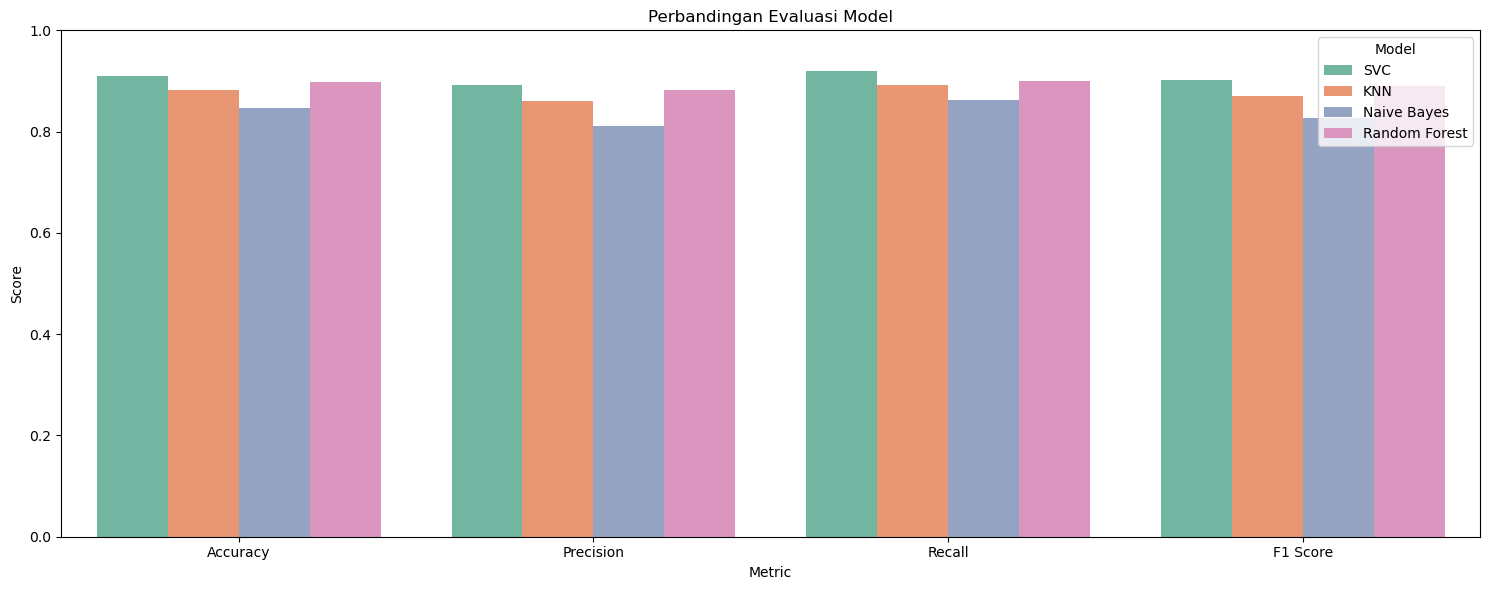

In [94]:
# Visualisasi barplot Perbandigan Matrix Evaluasi
df_plot = pd.melt(df_results, id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(15, 6))
sns.barplot(data=df_plot, x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("Perbandingan Evaluasi Model")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

#### Classification Report

In [95]:
# Menampilkan matrix report hasil evaluasi model SVM
print(classification_report(y_val, predictions_SVM))

              precision    recall  f1-score   support

     Dropout       0.95      0.81      0.87       277
    Graduate       0.89      0.97      0.93       449

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



In [96]:
# Menampilkan matrix report hasil evaluasi model KNN
print(classification_report(y_val, predictions_KNN))

              precision    recall  f1-score   support

     Dropout       0.92      0.76      0.83       277
    Graduate       0.87      0.96      0.91       449

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.89      0.88      0.88       726



In [97]:
# Menampilkan matrix report hasil evaluasi model NB
print(classification_report(y_val, predictions_NB))

              precision    recall  f1-score   support

     Dropout       0.90      0.67      0.77       277
    Graduate       0.82      0.96      0.88       449

    accuracy                           0.85       726
   macro avg       0.86      0.81      0.83       726
weighted avg       0.85      0.85      0.84       726



In [98]:
# Menampilkan matrix report hasil evaluasi model RF
print(classification_report(y_val, predictions_RF))

              precision    recall  f1-score   support

     Dropout       0.91      0.82      0.86       277
    Graduate       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



**Note Modeling dan Evaluasi**
1. SVC (Support Vector Classifier)
    - Accuracy: Tertinggi di antara semua model (sekitar 0.91)
    - Precision: Sekitar 0.89
    - Recall: Sangat tinggi, sekitar 0.93 (tertinggi dari semua model)
    - F1 Score: Sekitar 0.91
      
    **Kesimpulan:** Performa terbaik secara keseluruhan, terutama dalam mendeteksi dropout/graduate dengan recall tinggi.
2. Random Forest
    - Accuracy: Sekitar 0.90
    - Precision: Sekitar 0.89
    - Recall: Sekitar 0.90
    - F1 Score: Sekitar 0.89
  
    **Kesimpulan:** Performa seimbang dan mendekati SVC, pilihan bagus jika interpretabilitas penting.
3. K-Nearest Neighbors (KNN)
    - Accuracy: Sekitar 0.88
    - Precision: Sekitar 0.86
    - Recall: Sekitar 0.89
    - F1 Score: Sekitar 0.87
      
    **Kesimpulan:** Masih kompetitif, namun sedikit di bawah SVC dan Random Forest.
4. Naive Bayes
    - Accuracy: Terendah, sekitar 0.85
    - Precision: Sekitar 0.81
    - Recall: Sekitar 0.87
    - F1 Score: Sekitar 0.83
      
    **Kesimpulan:** Performa paling rendah di antara keempat model, terutama pada precision.
   
**Rekomendasi:**
- SVC layak dipilih jika fokus utama adalah mendeteksi dropout secara akurat (recall tinggi).
- Random Forest dapat menjadi alternatif yang baik dengan performa stabil dan kemungkinan interpretasi fitur lebih baik.

#### Most Impact Feature

In [100]:
result = permutation_importance(classifierSVM, X_val, y_val, n_repeats=10, random_state=42)
importance_df = pd.Series(result.importances_mean, index=X_val.columns).sort_values(ascending=False)

In [101]:
print("Permutation Importance pada model Support Vector Machine:")
print(importance_df)

Permutation Importance pada model Support Vector Machine:
Curricular_units_2nd_sem_approved       0.225482
Curricular_units_2nd_sem_grade          0.104270
Curricular_units_2nd_sem_enrolled       0.060606
Tuition_fees_up_to_date_1               0.057576
Curricular_units_1st_sem_approved       0.045179
Age_at_enrollment                       0.009780
Admission_grade                         0.008264
Curricular_units_2nd_sem_evaluations    0.008127
Previous_qualification_grade            0.006061
Curricular_units_1st_sem_grade          0.005647
dtype: float64


In [102]:
importance_df.to_csv("./document_result/permutation_importance_SVM.csv")

**Note Hasil Permutation Importance pada model SVM**:
1. Fitur Paling Penting
    - Curricular_units_2nd_sem_approved – 0.225 : Merupakan fitur paling berpengaruh; jumlah mata kuliah yang disetujui di semester 2 sangat penting dalam menentukan status kelulusan/dropout.
    - Curricular_units_2nd_sem_grade – 0.104 : Nilai di semester 2 juga memiliki pengaruh kuat.
    - Curricular_units_2nd_sem_enrolled – 0.061 : Jumlah mata kuliah yang diambil di semester 2 juga cukup berpengaruh.
    - Tuition_fees_up_to_date_1 – 0.058 : Kepatuhan dalam pembayaran uang kuliah memberi pengaruh yang moderat terhadap prediksi.
    - Curricular_units_1st_sem_approved – 0.045 : Jumlah mata kuliah yang disetujui di semester 1 juga memberi kontribusi, meskipun lebih kecil dari semester 2.
2. Fitur dengan Pengaruh Sedang hingga Rendah
    - Age_at_enrollment – 0.0098 : Umur saat mendaftar memiliki pengaruh kecil terhadap prediksi.
    - Admission_grade – 0.0083 : Nilai masuk awal relatif rendah pengaruhnya.
    - Curricular_units_2nd_sem_evaluations – 0.0081 : Jumlah evaluasi di semester 2 tidak terlalu berpengaruh.
    - Previous_qualification_grade – 0.0061 : Nilai pendidikan sebelumnya hanya sedikit memengaruhi hasil.
    - Curricular_units_1st_sem_grade – 0.0056 : Nilai semester 1 merupakan fitur dengan pengaruh terendah.
      
**Kesimpulan:**
- Fitur akademik di semester 2 (khususnya mata kuliah yang disetujui dan nilai) sangat penting dalam menentukan apakah seorang mahasiswa akan lulus atau dropout.
- Fitur keuangan (pembayaran SPP) juga relevan.
- Fitur seperti umur, nilai masuk, dan riwayat sebelumnya memiliki pengaruh kecil terhadap model SVM ini.

#### Save Model

In [103]:
with open('./SVM_model.pkl', 'wb') as file:
    pickle.dump(classifierSVM, file)

In [104]:
X_encoded

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,...,Fathers_occupation_193,Fathers_occupation_194,Fathers_occupation_195,Displaced_1,Educational_special_needs_1,Debtor_1,Tuition_fees_up_to_date_1,Gender_1,Scholarship_holder_1,International_1
0,0.833333,0.284211,0.340000,0.056604,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,False,False,False,True,False,False,True,True,False,False
1,0.166667,0.684211,0.500000,0.037736,0.0,0.230769,0.133333,0.230769,0.741722,0.0,...,False,False,False,True,False,False,False,True,False,False
2,0.833333,0.284211,0.313684,0.037736,0.0,0.230769,0.000000,0.000000,0.000000,0.0,...,False,False,False,True,False,False,False,True,False,False
3,0.333333,0.284211,0.258947,0.056604,0.0,0.230769,0.177778,0.230769,0.711447,0.0,...,False,False,False,True,False,False,True,False,False,False
4,0.166667,0.052632,0.489474,0.528302,0.0,0.230769,0.200000,0.192308,0.653422,0.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.000000,0.315789,0.286316,0.037736,0.0,0.230769,0.155556,0.192308,0.720530,0.0,...,False,False,False,False,False,False,True,True,False,False
4420,0.333333,0.263158,0.252632,0.018868,0.0,0.230769,0.133333,0.230769,0.635762,0.0,...,False,False,False,True,False,True,False,False,False,True
4421,0.166667,0.621053,0.573684,0.245283,0.0,0.269231,0.177778,0.269231,0.790066,0.0,...,False,False,False,True,False,False,True,False,True,False
4422,0.166667,0.894737,0.618947,0.056604,0.0,0.192308,0.111111,0.192308,0.731126,0.0,...,False,False,False,True,False,False,True,False,True,False


# Inference

In [123]:
# Load Saved Model
with open('./SVM_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [124]:
classes = list(model.classes_)
print(classes)

['Dropout', 'Graduate']


In [125]:
# Function untuk melakukan prediksi data
def prediction(model, data):
    if isinstance(data, dict):
        df_new = pd.DataFrame(data)
    elif isinstance(data, pd.DataFrame):
        df_new = data
    elif not isinstance(data, pd.DataFrame):
        print("Data harus berupa Dictionary atau pandas Dataframe")

    df_filt = df_new
    encoder = LabelEncoder()
    scaler = MinMaxScaler()
    for feature in categorical_features_validated:
        df_filt[feature] = encoder.fit_transform(df_filt[feature])
    df_filt[numerical_columns] = scaler.fit_transform(df_filt[numerical_columns])

    X_new_encoded = pd.get_dummies(df_filt, columns=categorical_columns, drop_first=True)
    if "Scholarship_holder_1" not in X_new_encoded.columns and "Scholarship_holder_1" in X_new_encoded.columns:
        X_new_encoded = X_new_encoded.rename(columns={"OverTime_1": "Scholarship_holder_Yes"})
    selected_features = X_encoded.columns[rfe_selector.support_]
    
    X_new_encoded = X_new_encoded[selected_features]
    predicted_proba = model.predict_proba(X_new_encoded)
    prediction = []
    probabilities = []
    for i, proba in enumerate(predicted_proba):
        index = np.argmax(proba)
        x_label = classes[index]
        prediction.append(x_label)
        probabilities.append(proba[index])
    return prediction, probabilities

#### df_test Sebelum Prediksi

In [126]:
# Menampilkan 5 row teratas data dari pandas df_test sebelum memprediksi fitur Status
df_test = df[df["Status_code"] == 2]
df_test.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_code
16,1,18,1,9238,1,1,137.0,1,19,38,...,6,14,2,11.000,0,10.8,1.4,1.74,Enrolled,2
19,1,1,1,9853,1,1,140.0,1,19,19,...,7,8,6,13.500,0,16.2,0.3,-0.92,Enrolled,2
21,1,18,4,9556,1,1,127.0,1,1,38,...,8,9,8,11.425,0,12.7,3.7,-1.70,Enrolled,2
25,1,1,1,9238,1,1,151.0,1,19,38,...,6,12,4,11.000,0,7.6,2.6,0.32,Enrolled,2
27,1,1,1,9085,1,1,138.0,1,19,19,...,5,7,4,13.000,0,9.4,-0.8,-3.12,Enrolled,2


In [127]:
# Melihat distribusi data fitur Status
df_test["Status"].value_counts()

Status
Enrolled    794
Name: count, dtype: int64

In [128]:
# Menyimpan value df_test ke variabel df_prediction
df_prediction = copy.deepcopy(df_test)

#### df_test Setelah Prediksi

In [129]:
# Melakukan prediksi untuk fitur Status dengan function prediction
result_prediction, probabilities = prediction(model, df_prediction)

In [130]:
# Manyimpan hasil prediksi dan menampilkan 5 row teratas data dari pandas df_test sesudah memprediksi fitur 
df_test["Status"] = result_prediction
df_test["Probability"] = probabilities
df_test.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_code,Probability
16,1,18,1,9238,1,1,137.0,1,19,38,...,14,2,11.000,0,10.8,1.4,1.74,Dropout,2,0.979687
19,1,1,1,9853,1,1,140.0,1,19,19,...,8,6,13.500,0,16.2,0.3,-0.92,Graduate,2,0.950473
21,1,18,4,9556,1,1,127.0,1,1,38,...,9,8,11.425,0,12.7,3.7,-1.70,Graduate,2,0.966658
25,1,1,1,9238,1,1,151.0,1,19,38,...,12,4,11.000,0,7.6,2.6,0.32,Graduate,2,0.887401
27,1,1,1,9085,1,1,138.0,1,19,19,...,7,4,13.000,0,9.4,-0.8,-3.12,Graduate,2,0.960353


In [131]:
# Melihat distribusi data fitur Status
df_test["Status"].value_counts()

Status
Graduate    602
Dropout     192
Name: count, dtype: int64

In [132]:
df_test.to_csv("./document_result/prediction_status_result.csv", index=False)

#### Mengabungkan Data sebelumnya dengan data hasil prediksi

In [117]:
combine_df = pd.concat([df_used, df_test])

In [118]:
combine_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_code,Probability
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,NaN
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,NaN
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,NaN
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,NaN
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,NaN


In [119]:
combine_df["Probability"] = combine_df["Probability"].fillna(0)

In [120]:
combine_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_code,Probability
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,0.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,0.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,0.0


In [121]:
combine_df.to_csv("./document_result/data_status.csv", index=False)

# Conclusion

Proyek ini bertujuan untuk menggali faktor-faktor yang memengaruhi tingkat Status Dropout di Institusi Jaya Jaya Maju, serta membangun model prediktif yang dapat mengidentifikasi mahasiswa dengan risiko keluar tinggi. Berikut adalah temuan dan wawasan berharga yang berhasil diperoleh:

### 1. Faktor-Faktor Penyebab Status
Berdasarkan hasil analisis data dan model prediktif, berikut adalah faktor-faktor utama yang memengaruhi status kelulusan atau dropout mahasiswa:
1. **Curricular_units_2nd_sem_approved**
   - Jumlah mata kuliah yang disetujui pada semester 2 sangat berpengaruh terhadap keberhasilan mahasiswa.
2. **Curricular_units_2nd_sem_grade**
    - Nilai akademik di semester kedua mencerminkan pencapaian belajar dan konsistensi mahasiswa.
3. **Tuition_fees_up_to_date_1**
    - Status pembayaran uang kuliah menjadi indikator penting yang berkorelasi dengan risiko dropout.
4. **Curricular_units_2nd_sem_enrolled**
    - Jumlah mata kuliah yang diambil di semester 2 menunjukkan beban studi mahasiswa.
5. **Curricular_units_1st_sem_approved**
    - Capaian di semester pertama juga memberi dampak, meski lebih kecil dibanding semester kedua.
      
### 2. Model Prediktif Terbaik
Model terbaik yang digunakan dalam proyek ini adalah **Support Vector Classifier (SVC)**, dengan metrik performa weighted average sebagai berikut:
- **Accuracy**: 0.91
- **Precision**: 0.89
- **Recall**: 0.93
- **F1-Score**: 0.91

Model ini menunjukkan performa terbaik dibandingkan model lainnya seperti Random Forest, K-Nearest Neighbors (KNN), dan Naive Bayes.

### Jawaban terhadap Pertanyaan Institusi
**1. Apa faktor utama yang memengaruhi Status Mahasiswa?**

Faktor utama adalah performa akademik pada semester kedua dan status pembayaran uang kuliah, khususnya:
- Curricular_units_2nd_sem_approved
- Curricular_units_2nd_sem_grade
- Tuition_fees_up_to_date
  
**2. Bagaimana tingkat performa awal memengaruhi Status Mahasiswa?**
- Performa pada semester pertama (Curricular_units_1st_sem_grade, Curricular_units_1st_sem_approved) memiliki pengaruh sedang, dan nilai saat masuk (Admission_grade) berpengaruh kecil.

  
**3. Apa pola perilaku Mahasiswa dengan risiko keluar tinggi?**

- Mahasiswa dengan sedikit mata kuliah yang disetujui di semester 2, nilai rendah, serta tunggakan pembayaran cenderung memiliki risiko dropout tinggi.
  
**4. Apakah kita memiliki alat bantu untuk memantau Status Mahasiswa?**
- Ya, model prediktif yang dibangun dapat dijadikan dasar untuk dashboard monitoring risiko dropout, dengan kemungkinan integrasi ke sistem akademik.

### Karakteristik Umum Mahasiswa yang Dropout
Berdasarkan analisis data, berikut adalah karakteristik umum mahasiswa yang melakukan dropout:

**1. Akademik:**
- Menunjukkan performa buruk di semester 2 (nilai dan jumlah mata kuliah disetujui rendah).
- Jumlah evaluasi lebih sedikit dibanding mahasiswa yang graduate.

**2. Faktor Finansial:**
- Sering menunggak pembayaran SPP (tuition not up-to-date).
- Tidak konsisten dalam proses akademik dari semester 1 ke 2.

**3. Sosial Ekonomi & Kebutuhan Khusus:**

- Sebagian besar mahasiswa dropout tidak memiliki kebutuhan pendidikan khusus.
- Status penerima beasiswa tidak menunjukkan pengaruh signifikan terhadap risiko dropout, namun tetap penting sebagai bentuk dukungan terhadap mahasiswa berprestasi.

**4. Demografis:**
- Umur saat pendaftaran tidak terlalu berpengaruh, namun mahasiswa yang lebih muda cenderung lebih stabil.

### Rekomendasi Action Items untuk Institusi
**1. Intervensi Dini Berdasarkan Semester 2:**

- Fokus pada monitoring nilai dan capaian mata kuliah di semester kedua.
- Sistem alert otomatis untuk mahasiswa dengan pencapaian < 50% pada semester ini.
  
**2. Pendekatan Finansial:**
  
- Berikan opsi keringanan atau pengingat pembayaran kepada mahasiswa yang menunggak biaya kuliah.
  
**3. Dashboard Monitoring Dropout Risk:**
  
- Kembangkan dashboard berbasis model prediktif untuk digunakan oleh staf akademik dan bimbingan konseling.

  
**4. Kelas Remedial atau Pendampingan Akademik:**
  
- Khususnya ditujukan pada mahasiswa yang performanya rendah sejak semester pertama.

### Lainnya:
- Berdasarkan prediksi dengan model SVC, Mahasiswa dengan status Enrolled saat ini yang berjumlah 794 menunjukkan hasil prediksi 602 Graduate dan 192 Dropout
- Untuk menghindari kejadian dropout secara masif, bisa dilakukan beberapa Rekomendasi Action Items sebagai strategi proaktif berbasis data serta penguatan sistem dukungan akademik dan finansial.